# MODEL EVALUATION

* How our sample perform in real life

* IN-SAMPLE EVALUATION:
    * How well our model will fit the data previously used to train it.

* In order to figire out how our sample fit the data, we split up the data into 2 parts
    * In-sample data : training set (approximately 70% of dataset)
    * Out-sample data: Test set (about 30% of dataset)
        

## SPLITTING DATA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
data= pd.read_csv("C:/Users/Win 10/Documents/R DIRECTORY/College.csv")
data.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [108]:
x = data[["Apps"]]
y = data[["Accept"]]

In [109]:
# Function train_test_split() : used to split the dataset into the training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0) # 30% is test data @-@

In [16]:
len(x_train)

543

In [17]:
len(y_train)

543

In [18]:
len(x_test)

234

In [19]:
len(y_test)

234

## GENERALIZATION PERFORMANCE

* Generalization error indicate how well our data does at predicting the previously unseen data.
* Error obtained from the testing data is the approximation of this type of error
* There is a trade-off between the accuracy of generalization error and precision of the model
    * If we use training data > testing data : the generalization error is nearly accurate, however, the values are varied (less precise)
    * If we use testing data> training data: the generalization error is less accuate (far away from the correct one), nontheless, the model has a good precision.


In [53]:
# WRONG -_-

from sklearn.linear_model import LinearRegression
lm=LinearRegression()

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.1,random_state=0)
lm.fit(x_train,y_train)
lm.score(x_test,y_test)

0.8514001536795116

# CROSS VALIDATION

* OUT-OF SAMPLE EVALUATION METRICS
* Idea: split up the data into many different partitions, then use combination to choose all possibility of training and testing dataset. To be more specific, 1 partition is used for the testing, the remaining cv-1 is used for training model. Hence, all possible combination is nC1 = n (=cv)

In [61]:
# Function cross_val_score(): used to apply the cross validation and get the R-squared values of all combination of testing dataset
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lm, x, y, cv=10)
scores

array([0.876683  , 0.87897151, 0.7007046 , 0.78892489, 0.88110788,
       0.85900155, 0.96995838, 0.91083171, 0.86542825, 0.87440989])

In [62]:
# In order to get the most accurate value of generalization error, we get the average of scores
scores.mean()

0.8606021657099243

In [73]:
# Function cross_val_predict: used to give the prediction of testing data, which use the same regression model as cross_val_score()
from sklearn.model_selection import cross_val_predict
yp= cross_val_predict(lm, x, y, cv=10)

# since there are 777 values of explanatory values, hence, there will be 777 predicted values for yp
yp[0:20].transpose()  # first 21 predicted values

array([[1223.23020454, 1536.46733125, 1085.0723844 ,  483.01395265,
         349.62019526,  584.25028637,  444.90145054, 1365.5565796 ,
         852.82432467,  581.27274714, 1266.10676941, 1813.97398723,
         936.79093088,  989.19562128,  528.86805674, 1080.30832163,
        2796.56193222,  958.82472116,  907.61104645, 2342.78495399]])

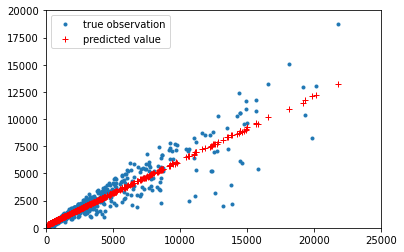

In [81]:
# Plotting
plt.plot(x,y,'.',label="true observation")
plt.plot(x,yp,'r+',label="predicted value")
plt.xlim(0,25000)
plt.ylim(0,20000)
plt.legend()
plt.show()

## OVERFITTING, UNDERFITTING AND MODEL SELECTION

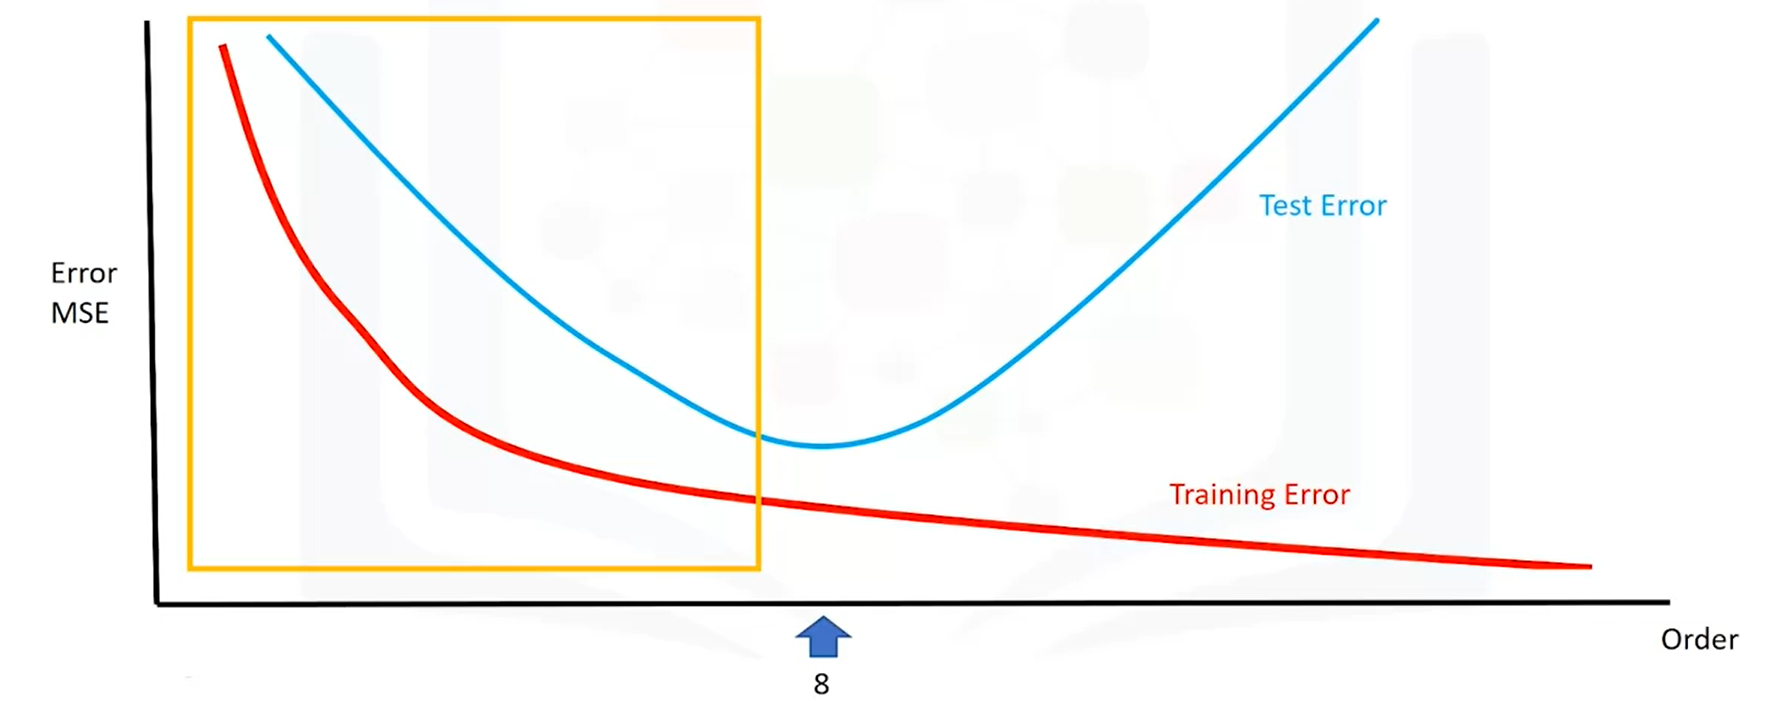

In [75]:
from IPython.display import Image
Image("C:/Users/Win 10/Pictures/MODEL_SELECTION.png")

* OBSERVATION: Though the Training error (MSE) decrease as the order of polynomial increase (which is obvious), the Test error will deacrease as order increase, until it reachs the optimal order
* For example, in the picture above, any polynomial regression model with order less than 8 is called under-fitting (the fitted line is so simplied and can not well explain the true values) and the polynomial model with order > 8 is called over-fitting (means that the regression line is too complicated though better fit the true values @-@)

## RIDGE REGRESSION

* Ridge regression is a regression that is employed in a Multiple regression model when Multicollinearity occurs. Multicollinearity is when there is a strong relationship among the independent variables. Ridge regression is very common with polynomial regression.  

* The smaller the anpha, the more likely that the regression model is over-fitting

In [121]:
from sklearn.linear_model import Ridge
Ridge_model= Ridge(alpha=0.1) # choose anpha=0.1 for ridge constructor
Ridge_model.fit(x,y)
yp= Ridge_model.predict(x)

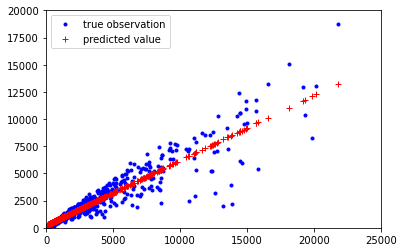

In [123]:
# Plotting
plt.plot(x,y,'b.',label="true observation")
plt.plot(x,yp,'r+',label="predicted value")
plt.xlim(0,25000)
plt.ylim(0,20000)
plt.legend()
plt.show()

In [87]:
Ridge_model.intercept_

array([225.27932018])

In [88]:
Ridge_model.coef_

array([[0.59751537]])

* CONCLUSION: So the best regression model at alpha=0.1 is linear regression

* METHOD: We use different alpha for ridge constructor, then construct the regression model for training data. Then, we predict the value for testing data, and calculate the R-squared. Choose the regression model of alpha which give highest R-squared @-@

In [134]:
# ALPHA= 0.01
Ridge_model= Ridge(alpha=0.01) # choose anpha=0.01 for ridge constructor
Ridge_model.fit(x_train,y_train)
yp= Ridge_model.predict(x_test)

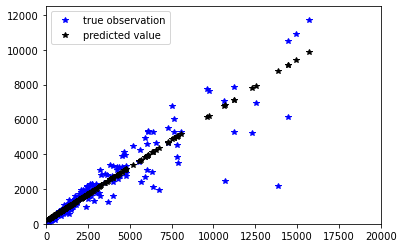

In [135]:
# Plotting
plt.plot(x_test,y_test,'b*',label="true observation")
plt.plot(x_test,yp,'k*',label="predicted value")
plt.xlim(0,20000)
plt.ylim(0,12500)
plt.legend()
plt.show()

In [136]:
Ridge_model.score(y_test,yp)

0.7205797894484434

In [146]:
# ALPHA= 0.1
Ridge_model= Ridge(alpha=0.1) 
Ridge_model.fit(x_train,y_train)
yp= Ridge_model.predict(x_test)

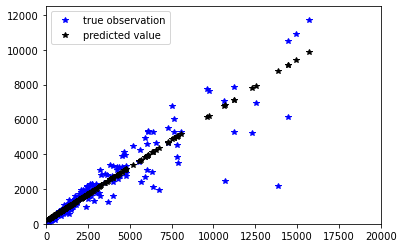

In [147]:
# Plotting
plt.plot(x_test,y_test,'b*',label="true observation")
plt.plot(x_test,yp,'k*',label="predicted value")
plt.xlim(0,20000)
plt.ylim(0,12500)
plt.legend()
plt.show()

In [148]:
Ridge_model.score(y_test,yp)

0.7205797894484433

In [149]:
# ALPHA= 10
Ridge_model= Ridge(alpha=10) 
Ridge_model.fit(x_train,y_train)
yp= Ridge_model.predict(x_test)

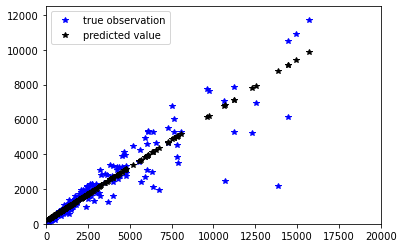

In [150]:
# Plotting
plt.plot(x_test,y_test,'b*',label="true observation")
plt.plot(x_test,yp,'k*',label="predicted value")
plt.xlim(0,20000)
plt.ylim(0,12500)
plt.legend()
plt.show()

In [151]:
Ridge_model.score(y_test,yp)

0.7205797894484434

In [152]:
# ALPHA= 100
Ridge_model= Ridge(alpha=100) 
Ridge_model.fit(x_train,y_train)
yp= Ridge_model.predict(x_test)

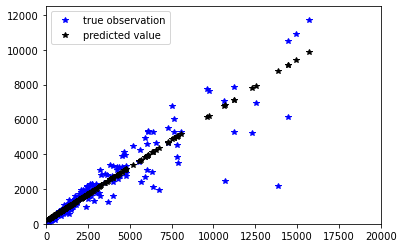

In [153]:
# Plotting
plt.plot(x_test,y_test,'b*',label="true observation")
plt.plot(x_test,yp,'k*',label="predicted value")
plt.xlim(0,20000)
plt.ylim(0,12500)
plt.legend()
plt.show()

In [154]:
Ridge_model.score(y_test,yp)

0.7205797894484433

## GRID SEARCH

* Search for hyperparameters (such as alpha in ridge regression) that generate the minimum error
* In order to search for such optimal hyperparameter, we need to split our dataset into 3 parts: 
    * TRAINING SET: Train the model
    * VALIDATION SET: Choose the optimal hyperparameters
    * TESTING SET: Evaluate the performance of model in real life

In [156]:
from sklearn.model_selection import GridSearchCV

In [162]:
param1= [{'alpha': [0.001,0.1,1,10,100,1000,100000]}]
Ridge_model=Ridge()

# Generate grid search model using the GridSearchCV() function
Grid_1= GridSearchCV(Ridge_model,param1, cv=5) 

# Fitting data
Grid_1.fit(x,y)

# Find the optimal estomator 
Grid_1.best_estimator_
Grid_1.cv_results_

{'mean_fit_time': array([0.00291758, 0.0058661 , 0.0079812 , 0.00800648, 0.00721378,
        0.00639944, 0.00828514]),
 'std_fit_time': array([1.74434735e-03, 3.64784168e-03, 2.00093281e-05, 5.06911759e-03,
        2.47887137e-03, 3.20018548e-03, 4.32002113e-04]),
 'mean_score_time': array([0.00440564, 0.00598793, 0.00685177, 0.00704317, 0.00639043,
        0.00484471, 0.00502076]),
 'std_score_time': array([0.00237191, 0.00320727, 0.00353556, 0.00372811, 0.00319632,
        0.00395579, 0.00412751]),
 'param_alpha': masked_array(data=[0.001, 0.1, 1, 10, 100, 1000, 100000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 100000}],
 'split0_test_score': array([0.87775886, 0.87775886, 0.87775886, 0.87775886, 0.87775886,
        0.87775885, 0.87775831]),
 'split1_test_score': array([0.7552

In [163]:
Grid_1.cv_results_['mean_test_score']

array([0.86493057, 0.86493057, 0.86493057, 0.86493057, 0.86493057,
       0.86493057, 0.86493073])

In [164]:
param2= [{'alpha': [0.001,0.1,1,10,100,1000,100000],'normalize':[True,False]}]
Ridge_model=Ridge()

# Generate grid search model using the GridSearchCV() function
Grid_2= GridSearchCV(Ridge_model,param2, cv=5) 

# Fitting data
Grid_2.fit(x,y)

# Find the optimal estomator 
Grid_2.best_estimator_
Grid_2.cv_results_

{'mean_fit_time': array([0.00372405, 0.00323668, 0.00484467, 0.00836573, 0.00558281,
        0.00681214, 0.01062188, 0.00817857, 0.00630856, 0.00819969,
        0.00995865, 0.00734224, 0.00972967, 0.00941854]),
 'std_fit_time': array([0.00164239, 0.00239526, 0.0031762 , 0.0007479 , 0.0032027 ,
        0.00348738, 0.00799969, 0.00439086, 0.0007066 , 0.00347046,
        0.00147221, 0.00915031, 0.00763731, 0.00204268]),
 'mean_score_time': array([0.00215755, 0.00409188, 0.00482702, 0.00483999, 0.00481281,
        0.00642428, 0.00234466, 0.00765438, 0.00493646, 0.00479941,
        0.00921679, 0.00453019, 0.007024  , 0.00418029]),
 'std_score_time': array([0.00125182, 0.00305484, 0.00394157, 0.0039525 , 0.00392972,
        0.00271911, 0.00326589, 0.00731641, 0.00335954, 0.00127988,
        0.0034106 , 0.00618172, 0.00613264, 0.00367652]),
 'param_alpha': masked_array(data=[0.001, 0.001, 0.1, 0.1, 1, 1, 10, 10, 100, 100, 1000,
                    1000, 100000, 100000],
              mask=[Fa